In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('star_classification.csv')

## Data Exploration

In [3]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
data.shape

(100000, 18)

In [5]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [8]:
data.isna().values.any()

False

In [9]:
data['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

### Coverting Categorical to Numerical

In [10]:
data['class'] = data['class'].map({'GALAXY':0, 'STAR':1, 'QSO':2})

In [11]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842


In [12]:
data['class'].value_counts()

0    59445
1    21594
2    18961
Name: class, dtype: int64

#### This Dataset is highly Unbalanced

<AxesSubplot: xlabel='class', ylabel='count'>

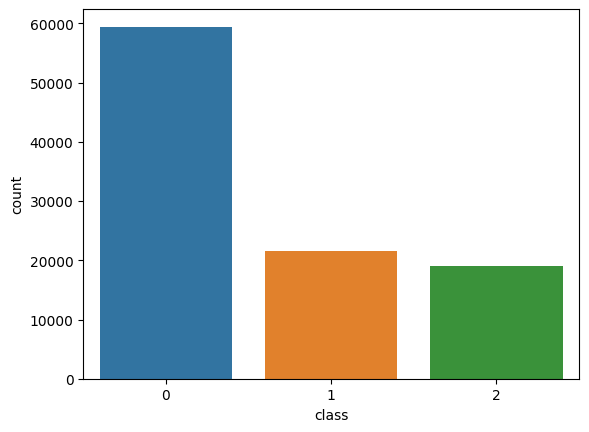

In [13]:
sns.countplot(x='class', data=data)

In [14]:
Galaxy = data[data['class'] == 0]
Star = data[data['class'] == 1]
QSO = data[data['class'] == 2]

In [15]:
Galaxy.shape, Star.shape, QSO.shape

((59445, 18), (21594, 18), (18961, 18))

## Under Sampling

In [16]:
# Building a sample dataset containing similiar distributions of all classes

Galaxy_sample = Galaxy.sample(n=18961)
Star_sample = Star.sample(n=18961)

In [17]:
new_data = pd.concat([Galaxy_sample, Star_sample, QSO], axis=0)

In [18]:
new_data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
40829,1.237679e+18,357.727785,-1.653275,21.80726,22.26542,21.35353,20.86273,21.20089,7778,301,5,301,1.036739e+19,0,0.694638,9208,57688,365
99340,1.237659e+18,209.944426,52.690526,24.91512,22.71158,20.94594,19.83579,19.42219,3180,301,4,49,7.587557e+18,0,0.565487,6739,56393,427
27111,1.237671e+18,153.234580,15.604293,19.57425,17.97929,17.08999,16.66104,16.33393,5972,301,5,252,2.913944e+18,0,0.072718,2588,54174,418
89928,1.237666e+18,31.493908,-0.995489,20.05276,19.25919,18.49010,18.17092,17.94290,4874,301,1,631,1.695663e+18,0,0.249058,1506,53003,211
39077,1.237663e+18,342.148653,0.095574,20.93081,19.44124,18.60705,18.06540,17.80285,4192,301,4,237,4.734656e+18,0,0.147185,4205,55454,898


In [19]:
new_data['class'].value_counts()

0    18961
1    18961
2    18961
Name: class, dtype: int64

<AxesSubplot: xlabel='class', ylabel='count'>

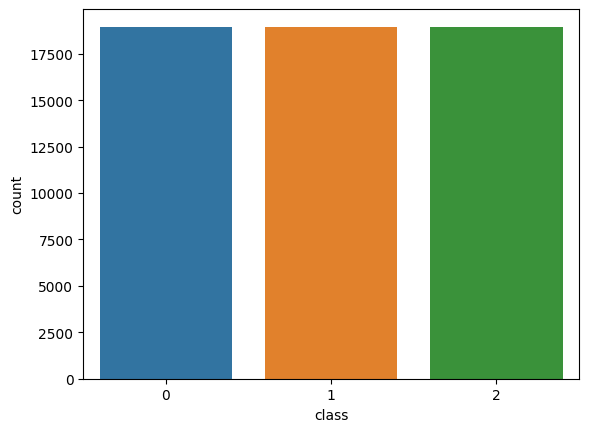

In [20]:
sns.countplot(x='class', data=new_data)

#### Now the distributions of classes are Equallly Distributed

# Splitting Feature & Target Variables

In [21]:
x = new_data.drop('class', axis=1)
y = new_data['class']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39818, 17), (17065, 17), (39818,), (17065,))

# Model Building

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [25]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = model.predict(x_test)
y_pred

array([1, 2, 1, ..., 2, 1, 0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

print('Accuracy : {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))

Accuracy : 96.06%


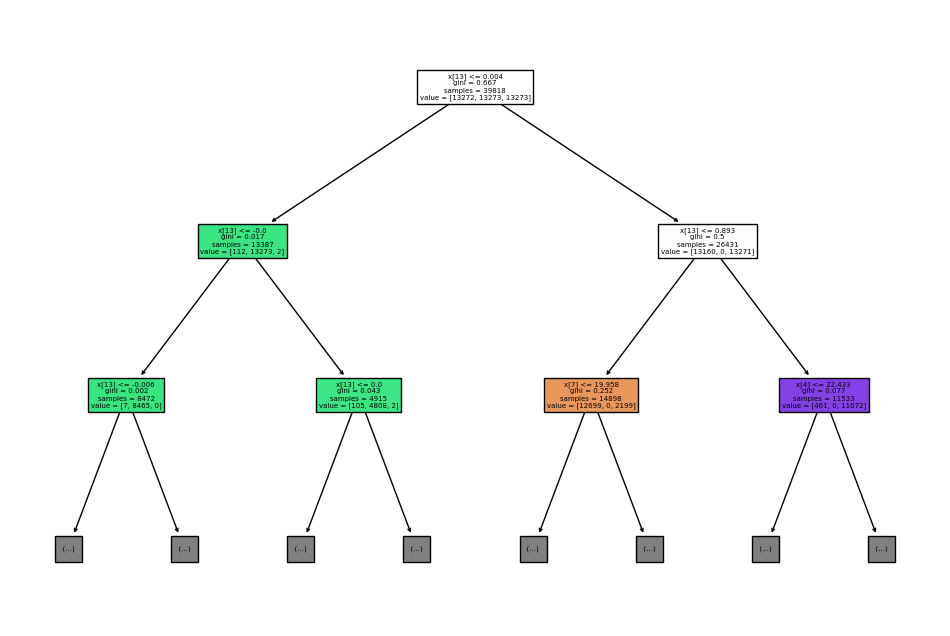

In [44]:
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(model, filled=True, max_depth=2);